

Graphical Represetation of flowers classification



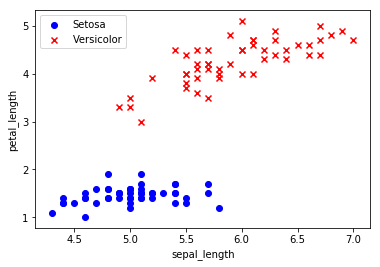



Error reduction against iterartions through data



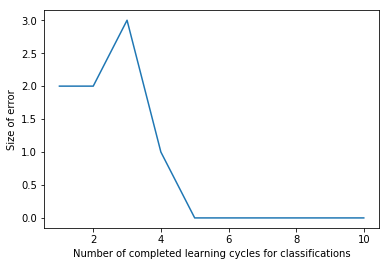



The predictions after learning

the flower belongs to Iris Setosa
the flower belongs to Iris Setosa
the flower belongs to Versicolor
the flower belongs to Iris Setosa
the flower belongs to Iris Setosa
the flower belongs to Iris Setosa
the flower belongs to Iris Setosa
the flower belongs to Iris Setosa
the flower belongs to Iris Setosa
the flower belongs to Iris Setosa
the flower belongs to Iris Setosa
the flower belongs to Versicolor
the flower belongs to Iris Setosa
the flower belongs to Iris Setosa
the flower belongs to Iris Setosa
the flower belongs to Versicolor
the flower belongs to Iris Setosa
the flower belongs to Iris Setosa
the flower belongs to Iris Setosa
the flower belongs to Versicolor
the flower belongs to Iris Setosa
the flower belongs to Iris Setosa
the flower belongs to Iris Setosa
the flower belongs to Iris Setosa


In [52]:
'''
Okello Job Opiyo
Reg no. P15/37353/2016
Perceptron Algorithm
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class Perceptron(object):
    #initializes every new object of the class
    def __init__(self, eta=0.01, n_iter=20):
        self.eta = eta #learnig rate
        self.n_iter = n_iter #training times
     
    #takes in data for training the perceptron
    def fit(self,X,y):
        self.w_ = np.zeros(1+X.shape[1]) #weight initialization
        self.errors = []
        
        #goes through each row of the data set and finds the error after every complete feed
        for _ in range(self.n_iter):
            errors = 0
            for xi,target in zip(X,y):
                update = self.eta*(target - self.predict(xi)) #  W = n(output-prediction)*X 
                self.w_[1:] += update * xi
                self.w_[0] = update #weight adjustment
                errors += int(update !=0.0)
            self.errors.append(errors)
            
        return self
    
    #calculates the net input
    def net_input(self,X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    #returns the next prediction after the end of each row of the data set 
    def predict(self,X):
        return np.where(self.net_input(X) >= 0.0,1,-1)

#linear representation of the data after classification
df = pd.read_csv('iris.data',header = None)
y = df.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa',-1,1)
X = df.iloc[0:100,[0,2]].values
plt.scatter(X[:50,0],X[:50,1], color = 'blue', marker = 'o', label = 'Setosa')
plt.scatter(X[50:100,0], X[50:100,1], color = 'red', marker = 'x', label = 'Versicolor')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend(loc = 'upper left')

print '\n\nGraphical Represetation of flowers classification\n=================================================\n'
plt.show()

#Classication errors representation after each learning cycle
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors) + 1), ppn.errors)
plt.xlabel('Number of completed learning cycles for classifications')
plt.ylabel('Size of error')

print '\n\nError reduction against iterartions through data\n=================================================\n'
plt.show()

#new data for classificatin
newData = [[5. ,1.4],[5.4,1.7],[7.2,5.8],[5. ,1.5],[4.4,1.4],[4.9,1.5],[5.4,1.5],[4.8,1.6],[4.8,1.4],[4.3,1.1],[5.8,1.2]
           ,[6.7,5.6],[5.4,1.3],[5.1,1.4],[5.7,1.7],[7.2,6.0],[5.4,1.7],[5.1,1.5],[4.6,1. ],[6.9,5.1],[4.8,1.9],[5. ,1.6]
           ,[5. ,1.6],[5.2,1.5]]

print '\n\nThe predictions after learning\n==============================\n'

#predictions on new data

for newIput in newData:
    
    if ppn.predict([newIput]) == -1:
        print 'the flower belongs to Iris Setosa'
    else:
        print 'the flower belongs to Versicolor'
        
    